In [1]:
import numpy as np
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
import mpl_toolkits
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')


In [2]:
#importing data
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#drop null columns
data.columns[data.isnull().any()]

Index(['waterfront', 'view', 'yr_renovated'], dtype='object')

In [7]:
data = data.drop('waterfront', axis='columns')

In [8]:
data = data.drop('view', axis='columns')

In [9]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

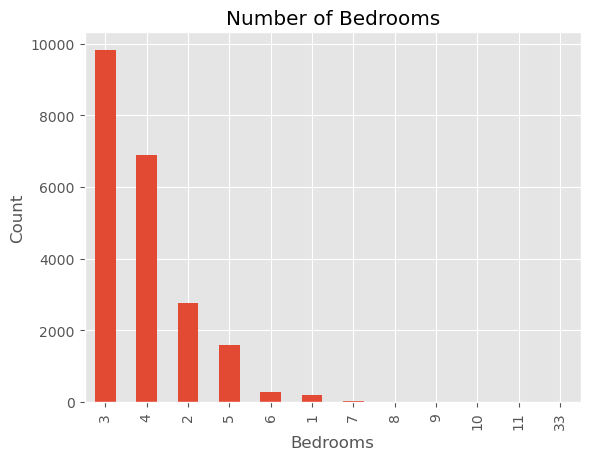

In [11]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title ('Number of Bedrooms')
plt.xlabel ('Bedrooms')
plt.ylabel ('Count')
sns.despine

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

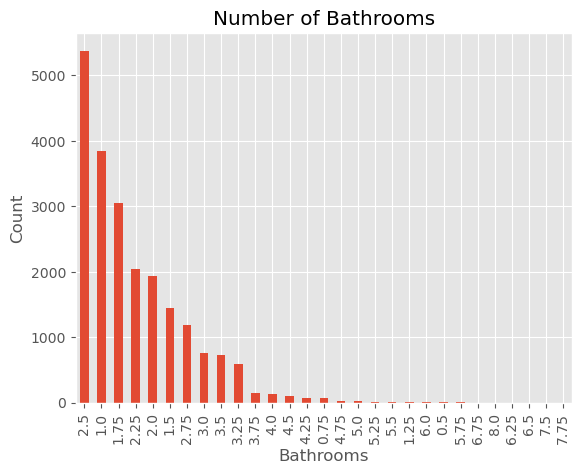

In [12]:
data['bathrooms'].value_counts().plot(kind='bar')
plt.title ('Number of Bathrooms')
plt.xlabel ('Bathrooms')
plt.ylabel ('Count')
sns.despine

<Figure size 1500x1500 with 0 Axes>

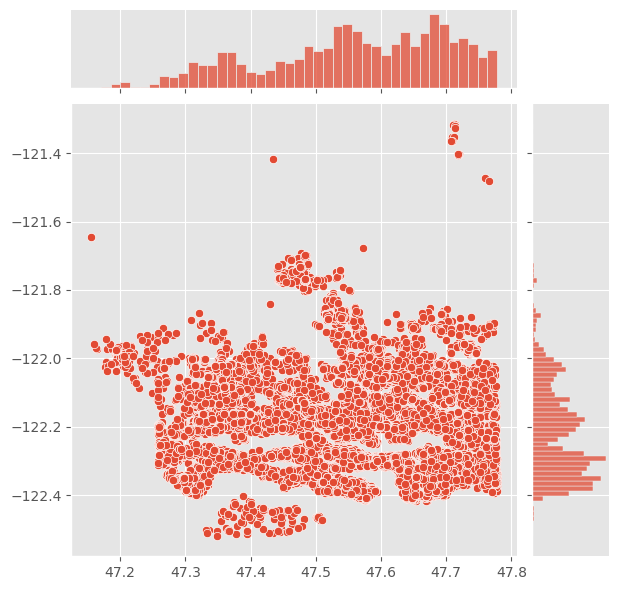

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
plt.figure(figsize=(15,15))
sns.jointplot(x=data.lat.values, y=data.long.values)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()
sns.despine


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

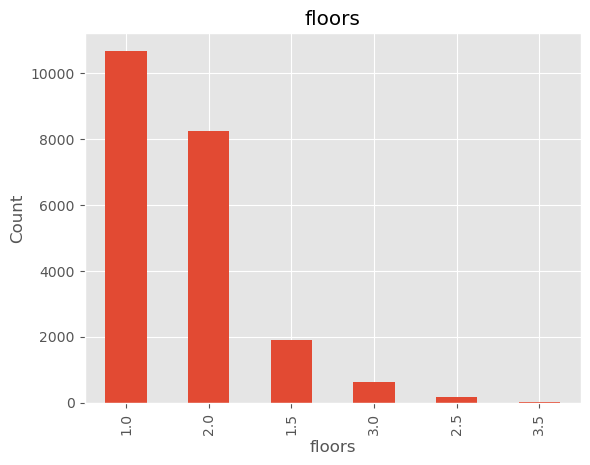

In [14]:
data['floors'].value_counts().plot(kind='bar')
plt.title ('floors')
plt.xlabel ('floors')
plt.ylabel ('Count')
sns.despine

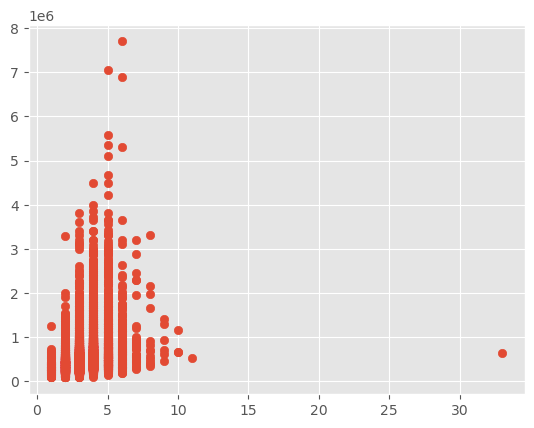

In [15]:
x = data['bedrooms']
y = data['price']

plt.scatter(x, y)
plt.show()

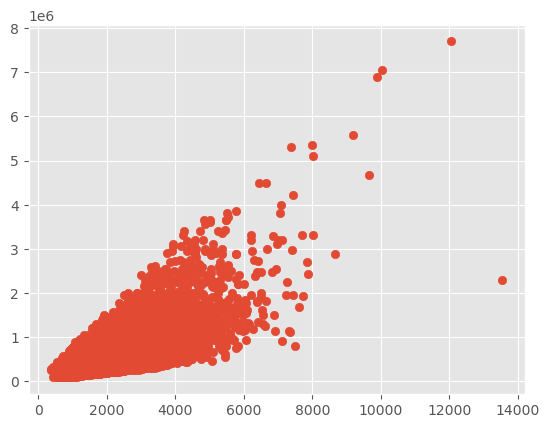

In [16]:
x = data['sqft_living']
y = data['price']

plt.scatter(x, y)
plt.show()

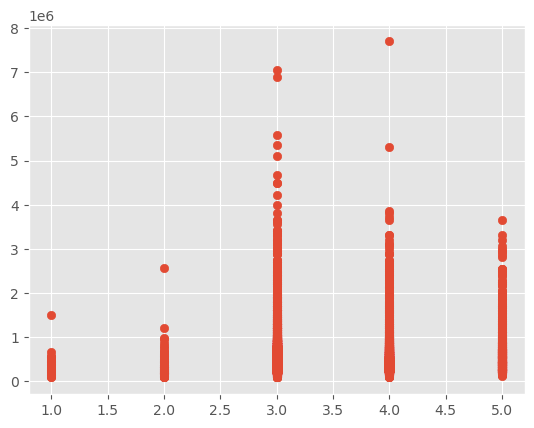

In [17]:
x = data['condition']
y = data['price']

plt.scatter(x, y)
plt.show()

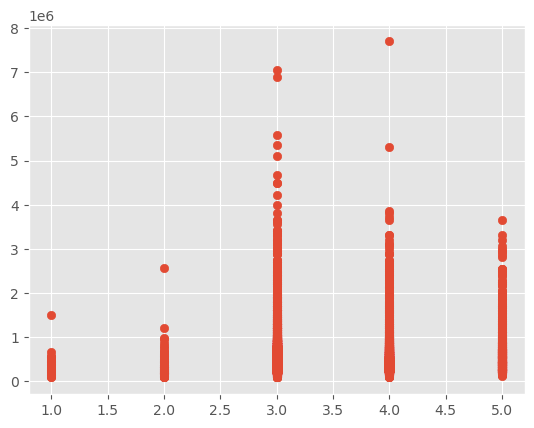

In [18]:
x = data['condition']
y = data['price']

plt.scatter(x, y)
plt.show()

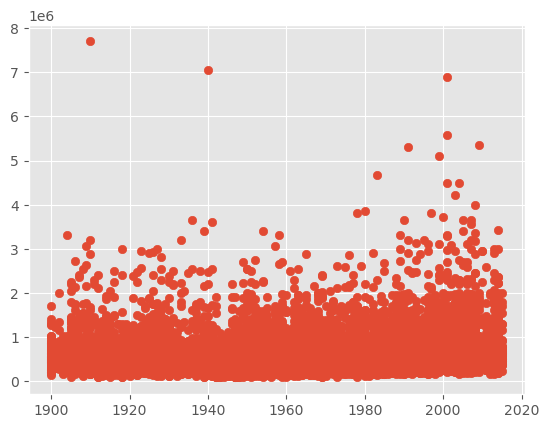

In [19]:
x = data['yr_built']
y = data['price']

plt.scatter(x, y)
plt.show()

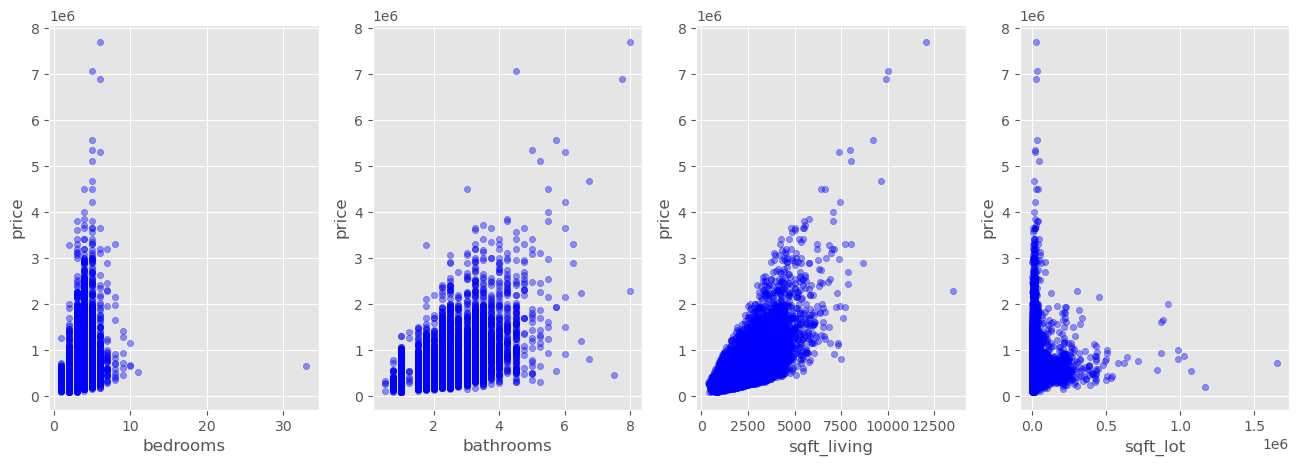

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['bedrooms','bathrooms', 'sqft_living', 'sqft_lot'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


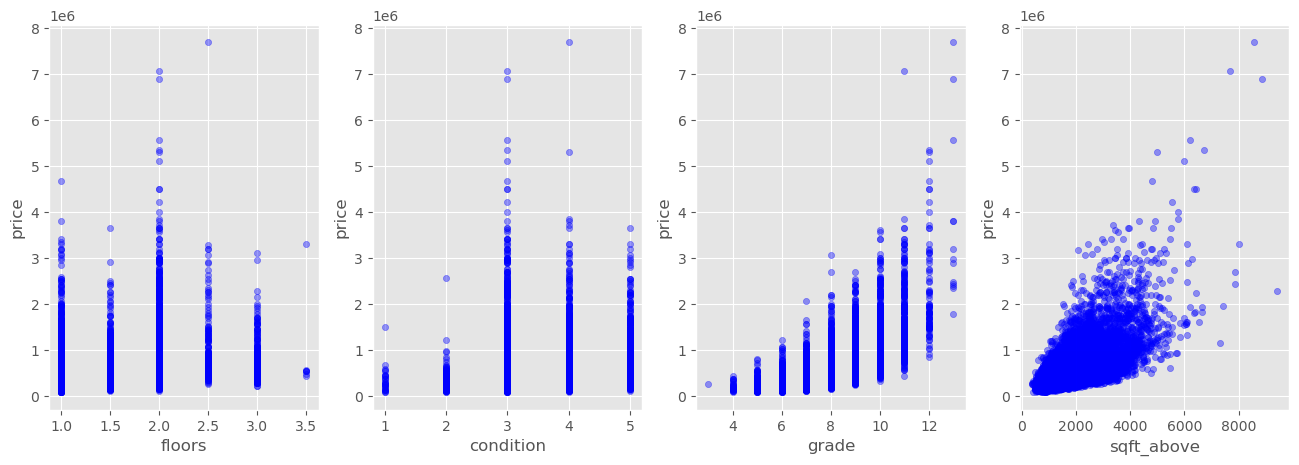

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['floors', 'condition', 'grade', 'sqft_above'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


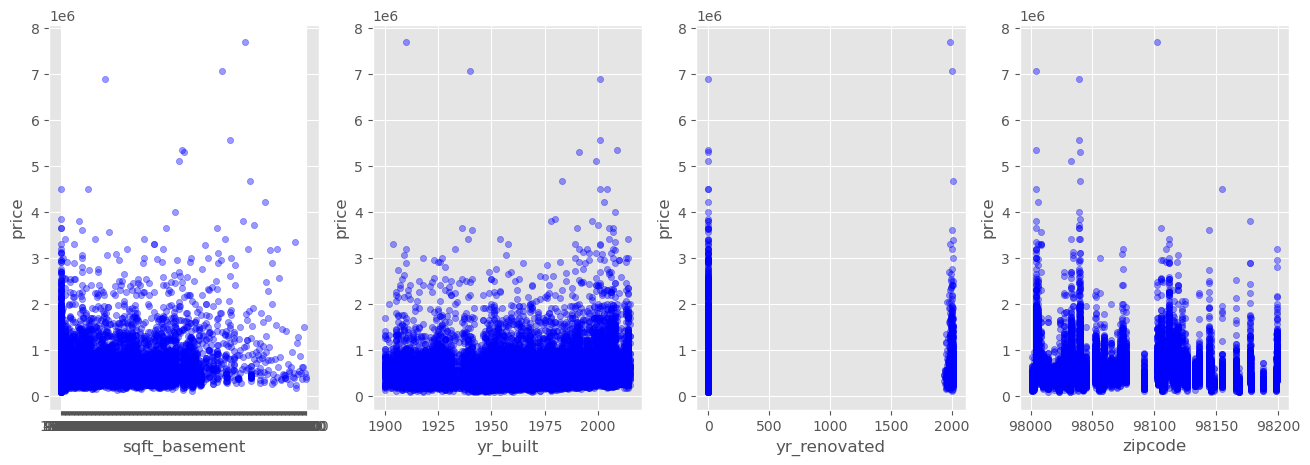

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['sqft_basement', 'yr_built', 'yr_renovated','zipcode'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


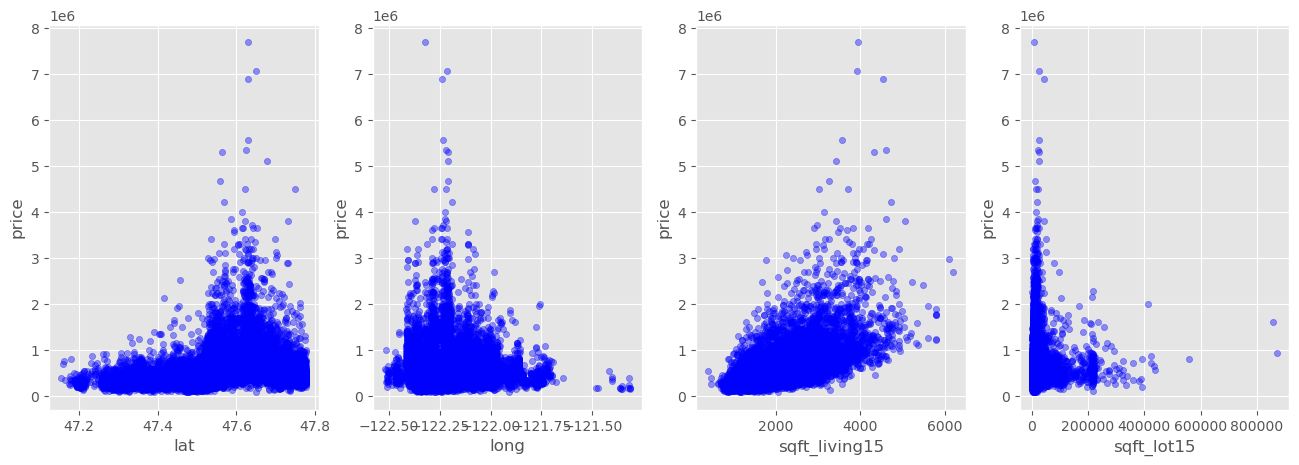

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,5))
for xcol, ax in zip(['lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')


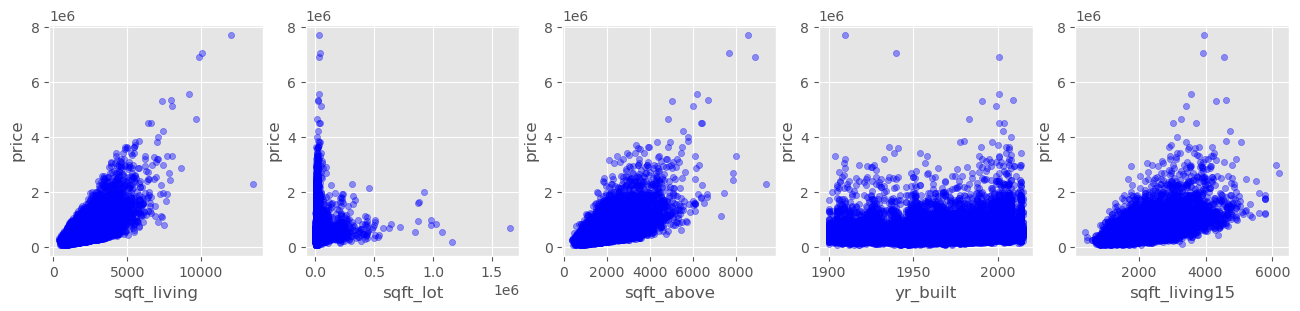

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

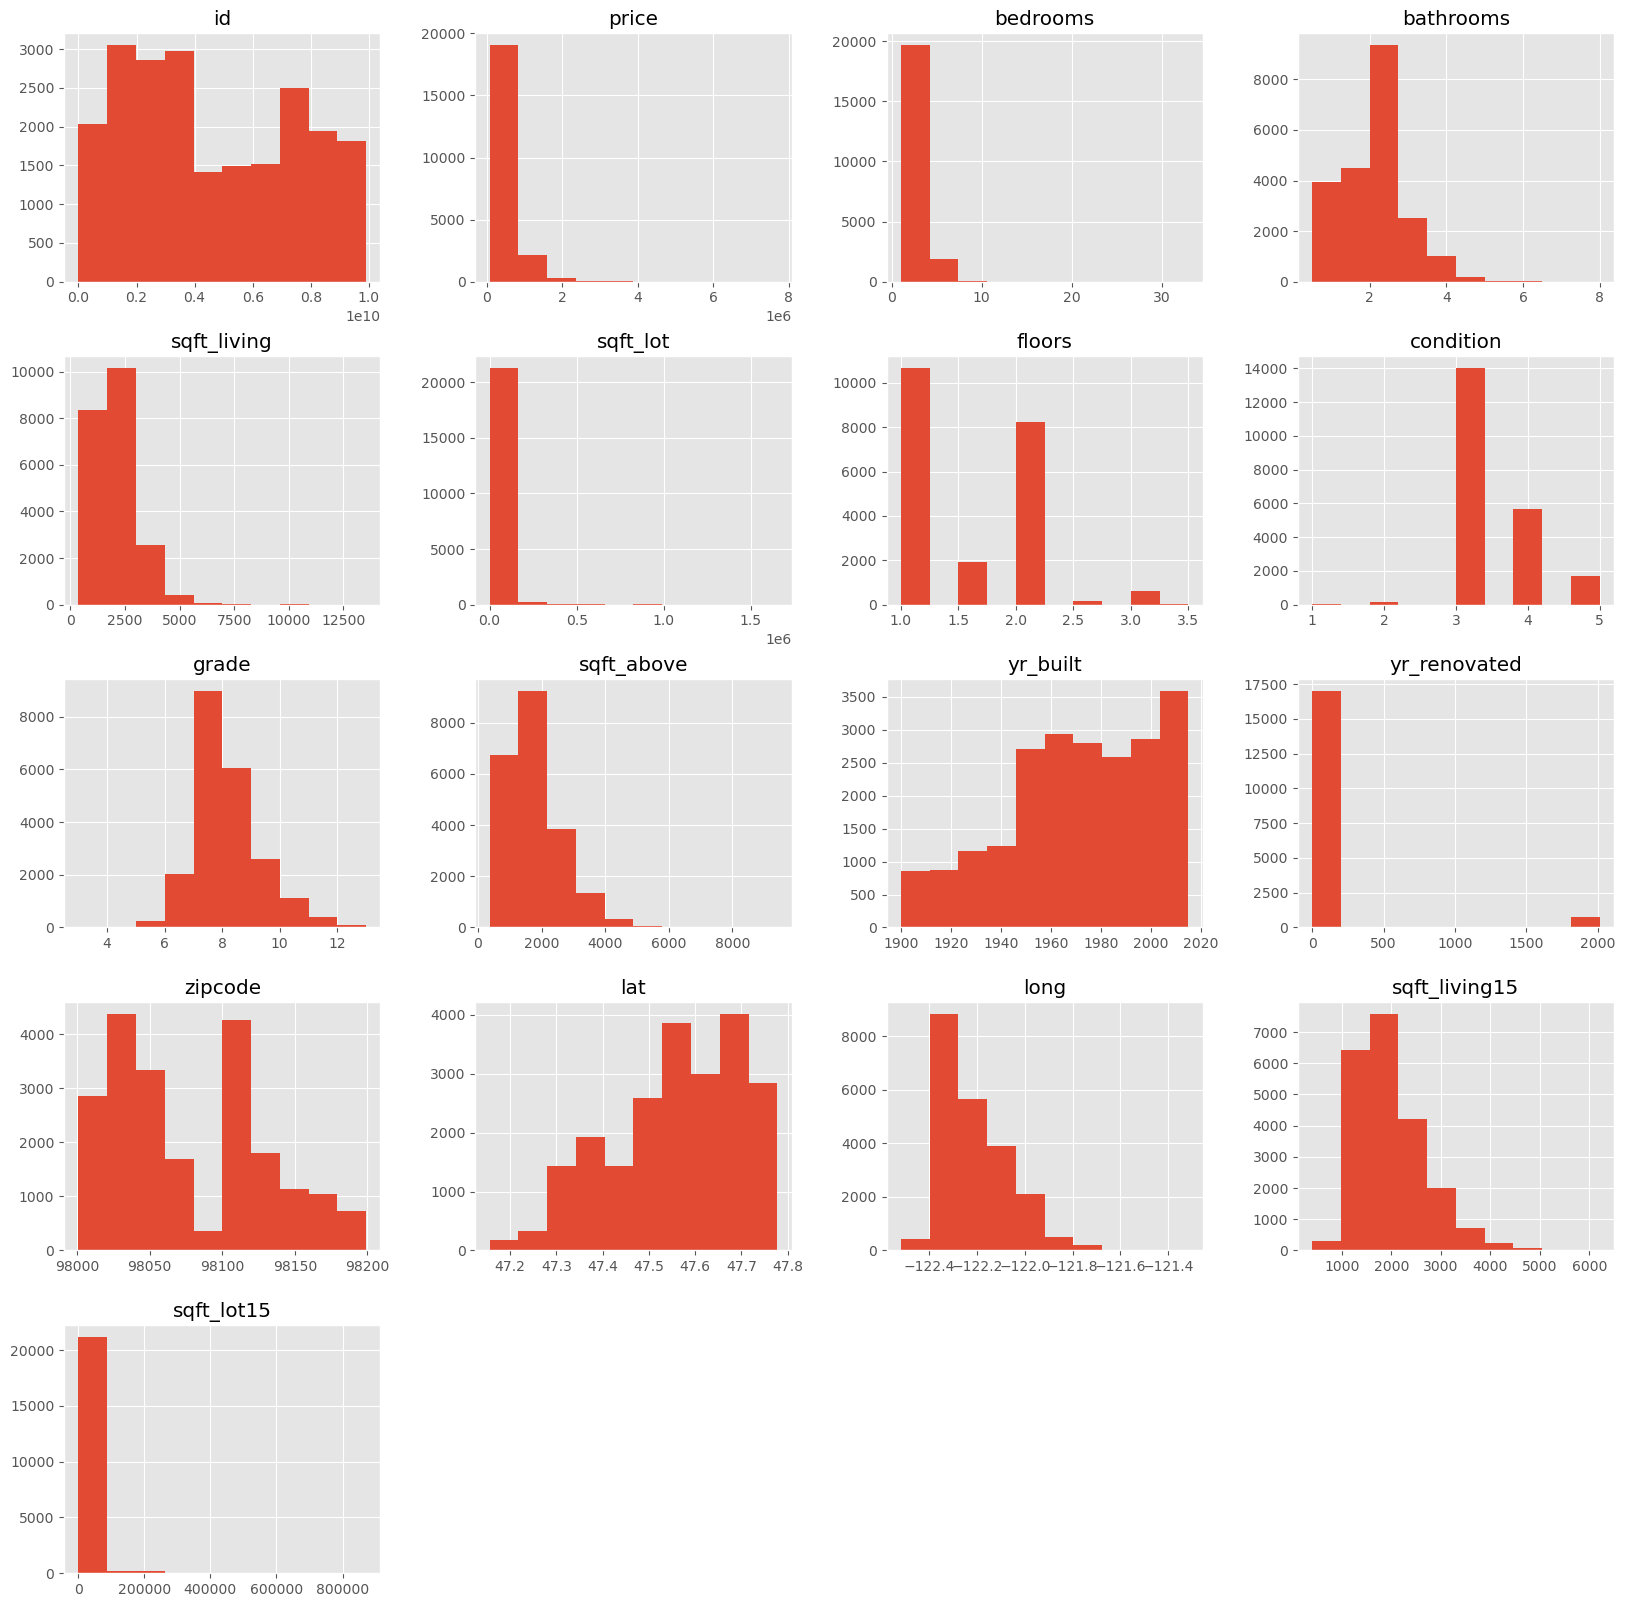

In [25]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
data.hist(ax = ax);

In [26]:
#newer = data.loc[data['yr_built'] > 1970]
#older = data.loc[data['yr_built'] < 1970]

data['new_yrbuilt'] = np.where(data['yr_built']>1970,'Y','N')

data 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_yrbuilt
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,N
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,N
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,N
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,N
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Y
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Y
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Y
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Y


In [27]:
data['new_yrbuilt'] = data.new_yrbuilt.map({'N':0, 'Y':1})
pd.get_dummies(data.new_yrbuilt, prefix='new_yrbuilt').iloc[:, 1:]


,new_yrbuilt_1
0,0
1,0
2,0
3,0
4,1
...,...
21592,1
21593,1
21594,1
21595,1


In [28]:
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data['sqft_living'].astype(str).astype(int) 
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [29]:
data_pred = data.iloc[:,1:21]
data_pred.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


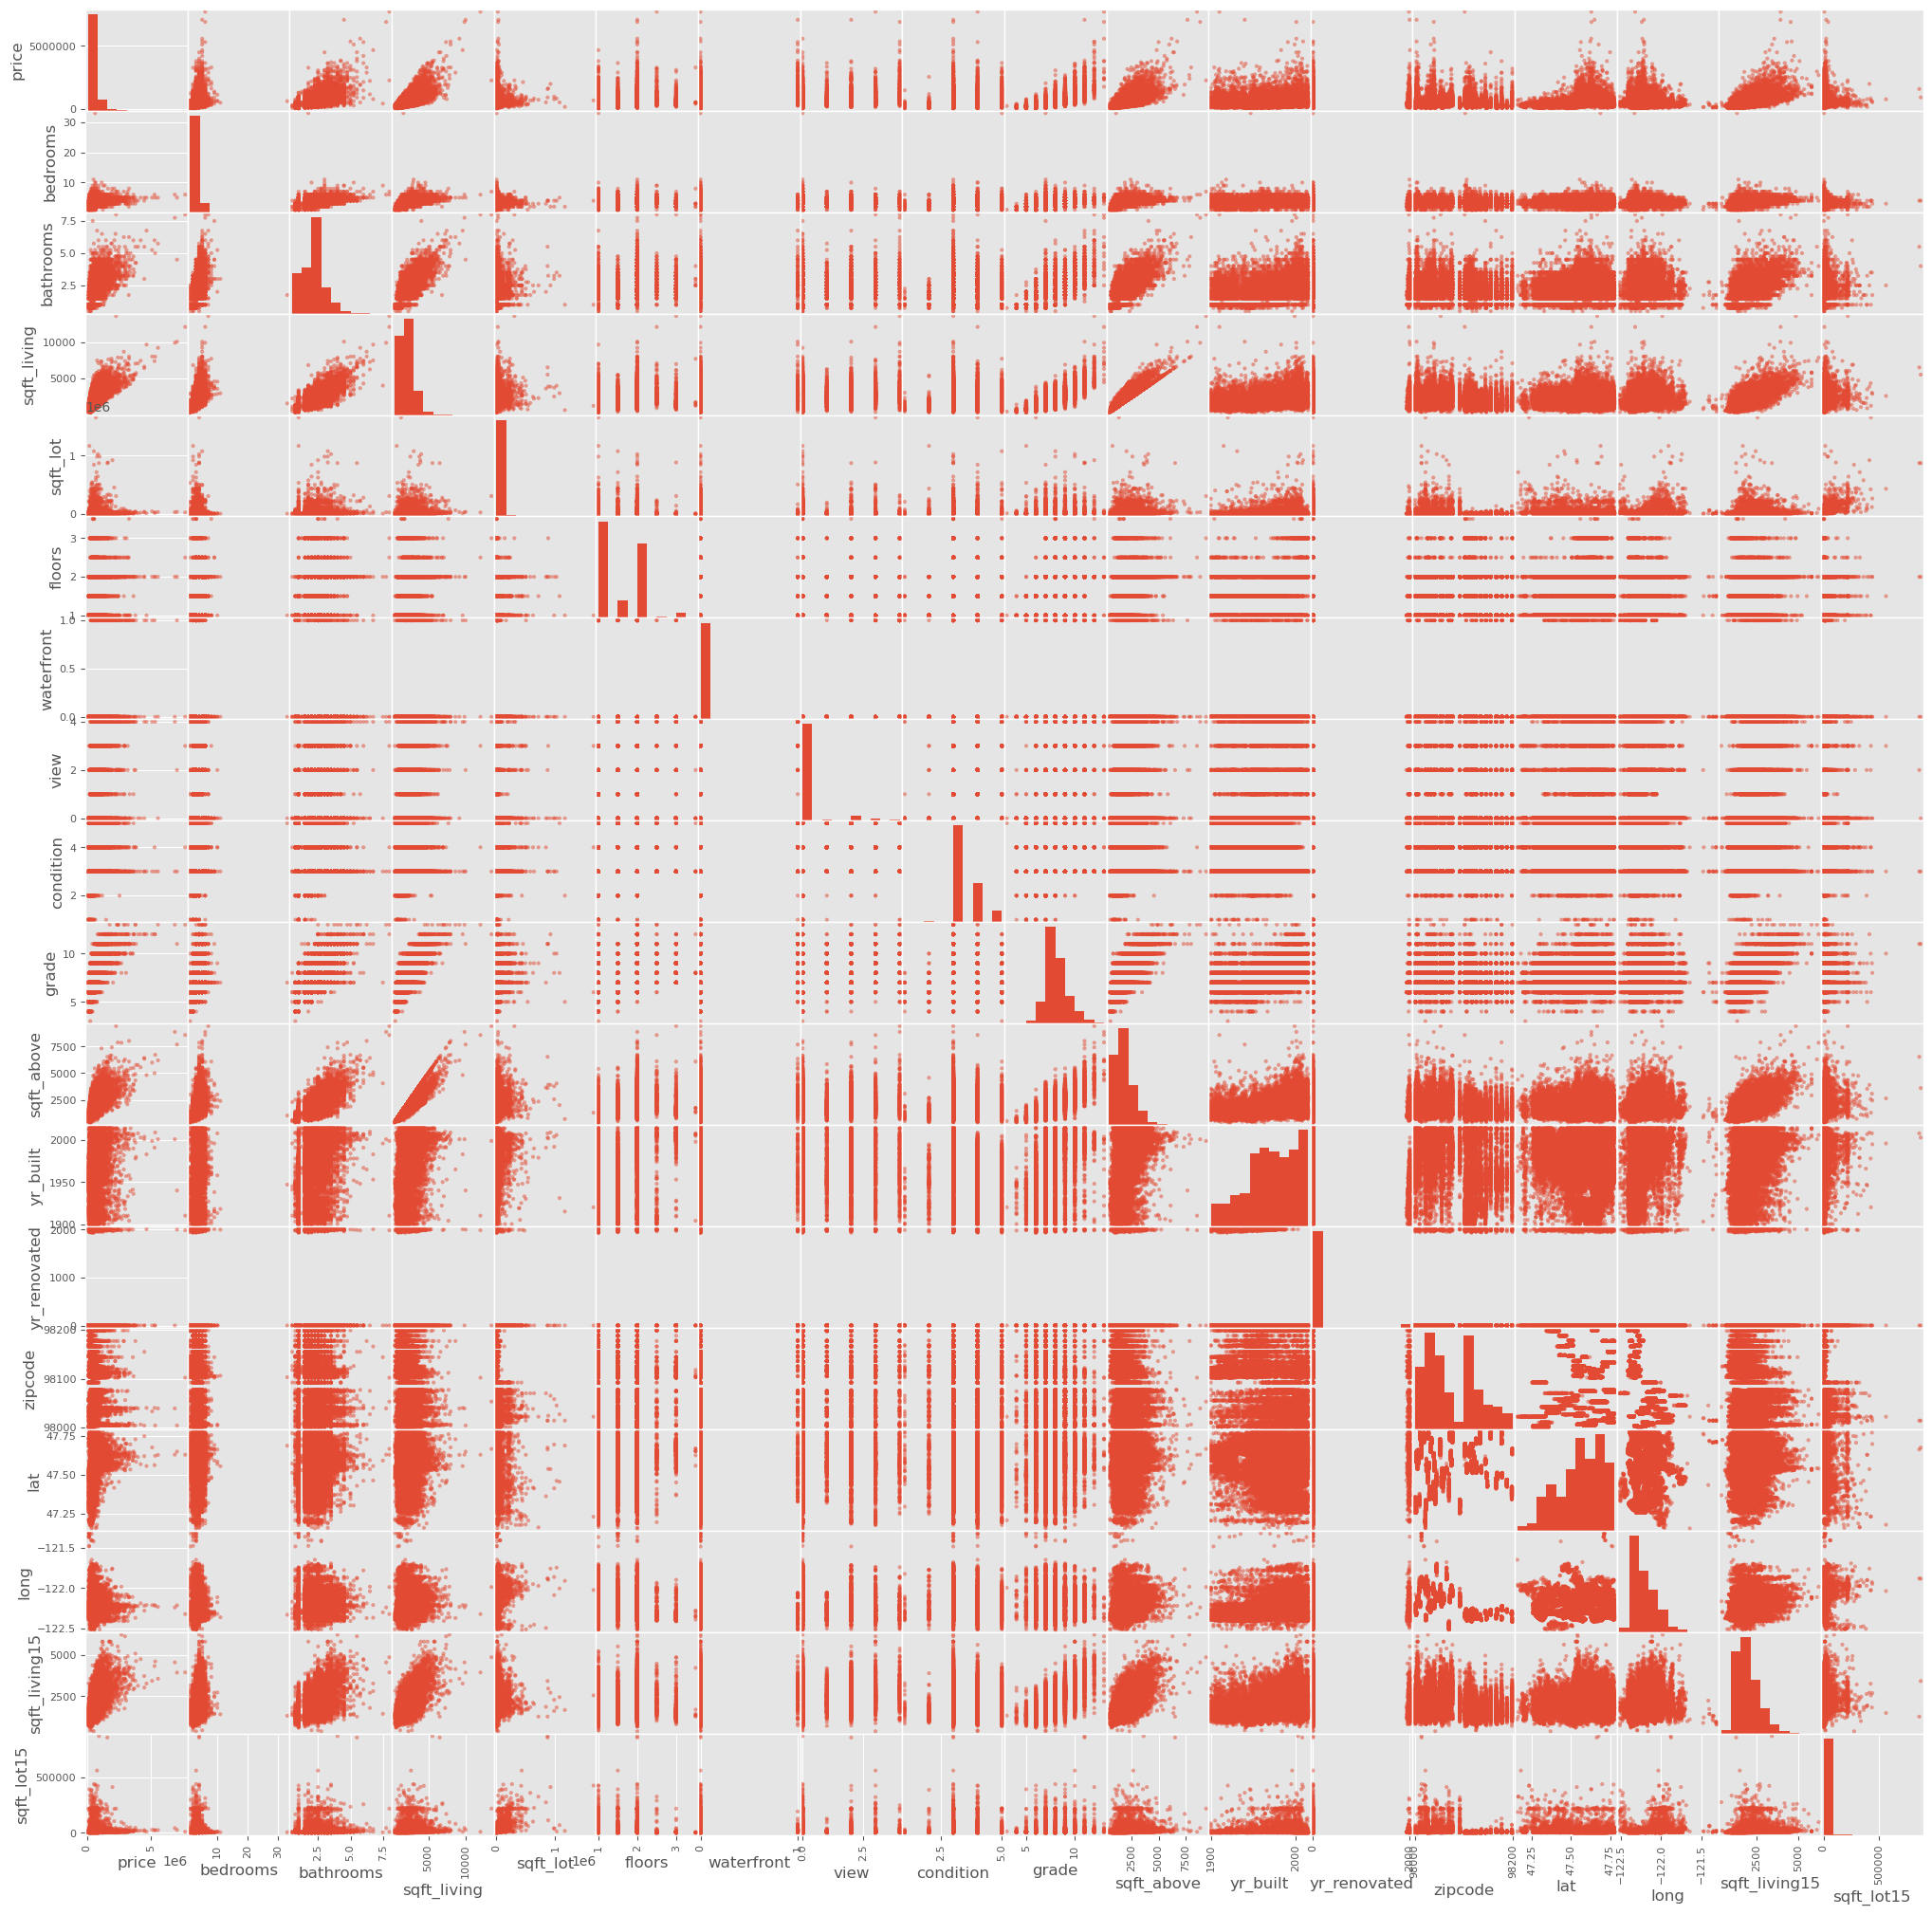

In [57]:
pd.plotting.scatter_matrix(data_pred,figsize  = [25, 25]);
plt.show()

In [31]:
data_pred.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


In [32]:
abs(data_pred.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [39]:
data=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)
data['pairs'] = list(zip(data.level_0, data.level_1))
data.set_index(['pairs'], inplace = True)
data.drop(columns=['level_1', 'level_0'], inplace = True)
data.columns = ['cc']
data.drop_duplicates(inplace=True)

In [42]:
data[(data.cc>.75) & (data.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

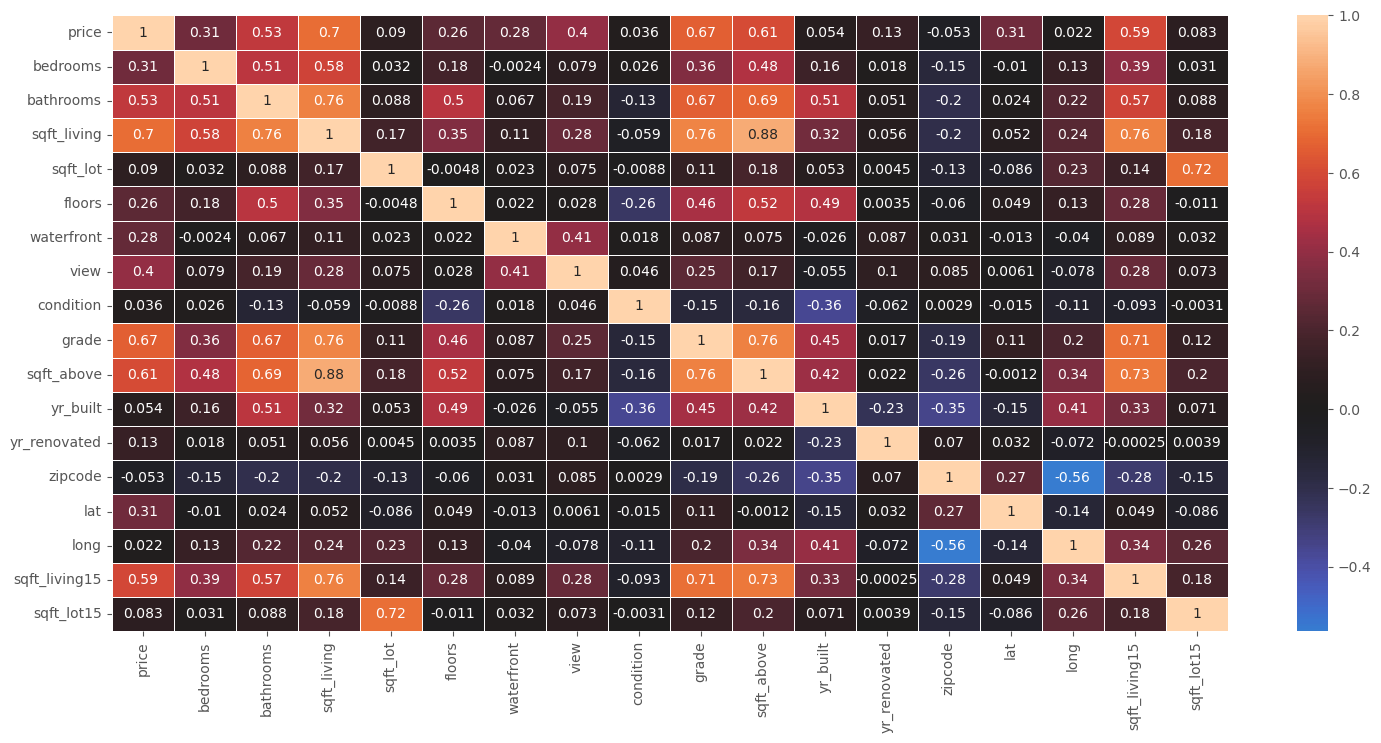

In [48]:
#correlation plot
#corr = data.corr()  
fig, ax = plt.subplots(figsize=(18, 8))
sns.heatmap(data=data_pred.corr(), linewidths=0.5, center=0, annot=True, ax=ax)
sns.heatmap

In [50]:
data= pd.read_csv('/Users/reffer/Desktop/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [51]:
from statsmodels.formula.api import ols
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     5161.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:43:32   Log-Likelihood:            -2.9890e+05
No. Observations:               21597   AIC:                         5.978e+05
Df Residuals:                   21591   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -6.52e+05   1.36e+04    -48.079      0.000   -6.79e+05   -6.25e+05
sqft_above      -80.6961      4.458    -18.101      0.000     -89.434     -71.958
sqft_living     245.5631      4.528     54.238      0.000     236.689     254.437
grade          1.119e+05   2470.776     45.293      0.000    1.07e+05    1.17e+05
sqft_living15    22.2598      4.032      5.520      0.000      14.356      30.164
bathrooms     -3.567e+04   3440.363    -10.369      0.000   -4.24e+04   -2.89e+04
==============================================================================
Omnibus:                    17251.912   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1128620.760
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.771   Cond. No.                     2.96e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

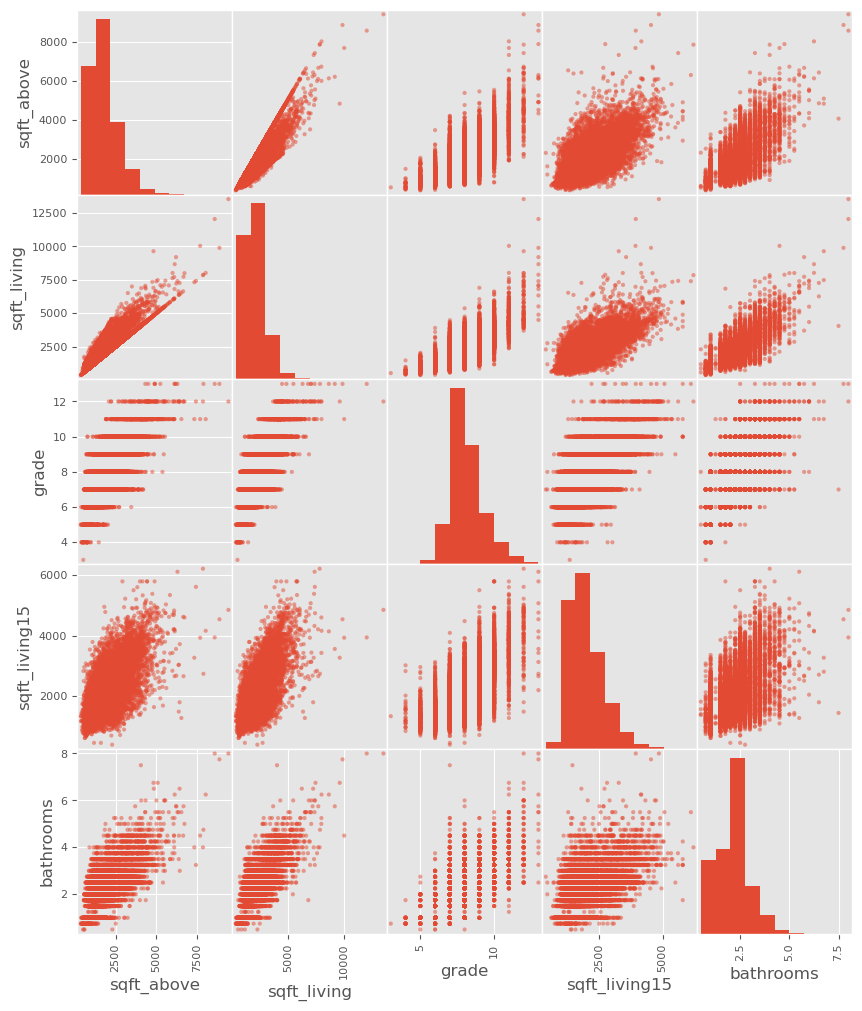

In [52]:
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

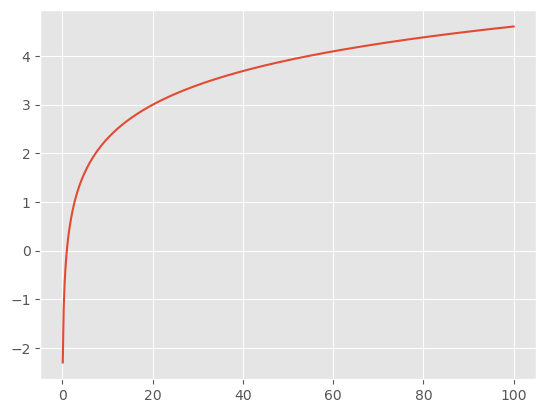

In [53]:
#Logarithmic Functions
x = np.linspace(start=-100, stop=100, num=10**3)
y = np.log(x)
plt.plot(x, y);

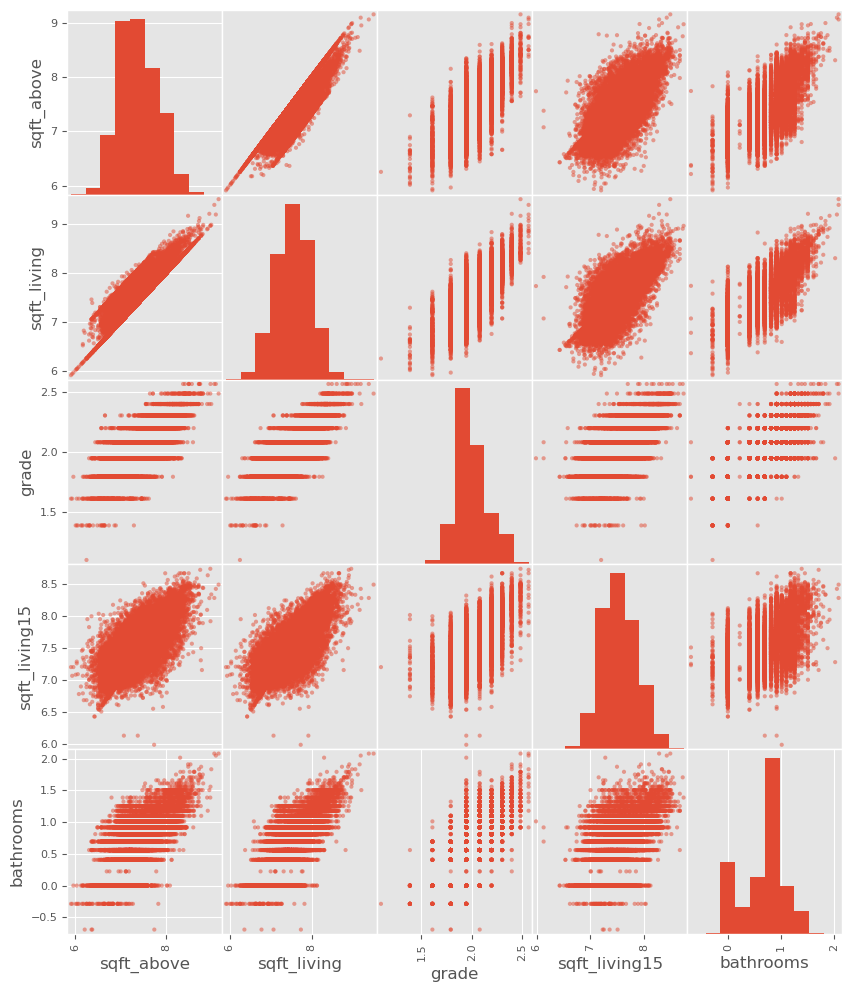

In [54]:
#Non-Normal Features
non_normal = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
for feat in non_normal:
    data[feat] = data[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

In [55]:
outcome = 'price'
x_cols = ['sqft_above', 'sqft_living', 'grade', 'sqft_living15', 'bathrooms']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     3649.
Date:                Sun, 05 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:47:29   Log-Likelihood:            -3.0078e+05
No. Observations:               21597   AIC:                         6.016e+05
Df Residuals:                   21591   BIC:                         6.016e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.222e+06   5.44e+04    -77.678      0.000   -4.33e+06   -4.12e+06
sqft_above    -1.034e+05   9034.765    -11.443      0.000   -1.21e+05   -8.57e+04
sqft_living    3.555e+05   1.04e+04     34.112      0.000    3.35e+05    3.76e+05
grade          1.041e+06   2.02e+04     51.419      0.000       1e+06    1.08e+06
sqft_living15  1.064e+05   8907.027     11.942      0.000    8.89e+04    1.24e+05
bathrooms     -9.908e+04   7402.387    -13.384      0.000   -1.14e+05   -8.46e+04
==============================================================================
Omnibus:                    20839.177   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2504590.767
Skew:                           4.371   Prob(JB):                         0.00
Kurtosis:                      55.027   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""